
 ****** Running generation 0 ****** 

Population's average fitness: 2.21964 stdev: 0.34920
Best fitness: 2.99889 - size: (1, 2) - species 1 - id 123
Average adjusted fitness: 0.526
Mean genetic distance 0.897, standard deviation 0.422
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   200      3.0    0.526     0
Total extinctions: 0
Generation time: 0.023 sec
Saving checkpoint to neat-checkpoint-0

 ****** Running generation 1 ****** 

Population's average fitness: 1.93915 stdev: 1.66521
Best fitness: 2.99889 - size: (1, 2) - species 1 - id 123
Average adjusted fitness: 0.882
Mean genetic distance 1.072, standard deviation 0.456
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   200      3.0    0.882     1
Total extinctions: 0
Generation time: 0.023 sec (0.023 average)
Saving checkpoint to neat-checkpoint-1

 ****

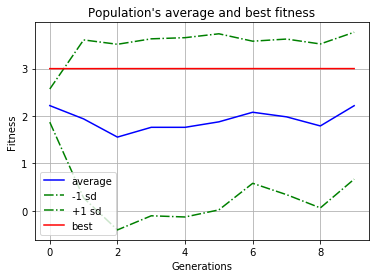

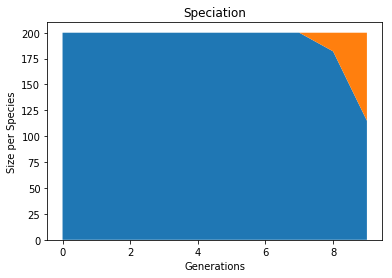

In [54]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import os
import neat
import visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2
            


def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(1))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 10)

    # Display the winning genome.
    print("\nBest genome:\n{!s}".format(winner))

    # Show output of the most fit genome against training data.
    print("\nOutput:")
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1: "A", -2: "B", 0: "A XOR B"}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    #p = neat.Checkpointer.restore_checkpoint("neat-checkpoint-4")
    #p.run(eval_genomes, 2)


if __name__ == "__main__":
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward")
    run(config_path)

In [55]:
config_path = os.path.join(local_dir, "config-feedforward")
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [17]:
for i in range(1):
    print(i)
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        print(each,p.population[each].fitness)
        #visualize.draw_net(config, p.population[each], False, filename='xoreach/{}/{}'.format(i,each), fmt="jpg")

0
72 2.9946309215148466
201 None
202 None
203 None
204 None
205 None
206 None
207 None
208 None
209 None
210 None
211 None
212 None
213 None
214 None
215 None
216 None
217 None
218 None
219 None
220 None
221 None
222 None
223 None
224 None
225 None
226 None
227 None
228 None
229 None
230 None
231 None
232 None
233 None
234 None
235 None
236 None
237 None
238 None
239 None
240 None
241 None
242 None
243 None
244 None
245 None
246 None
247 None
248 None
249 None
250 None
251 None
252 None
253 None
254 None
255 None
256 None
257 None
258 None
259 None
260 None
261 None
262 None
263 None
264 None
265 None
266 None
267 None
268 None
269 None
270 None
271 None
272 None
273 None
274 None
275 None
276 None
277 None
278 None
279 None
280 None
281 None
282 None
283 None
284 None
285 None
286 None
287 None
288 None
289 None
290 None
291 None
292 None
293 None
294 None
295 None
296 None
297 None
298 None
299 None
300 None
301 None
302 None
303 None
304 None
305 None
306 None
307 None
308 None
309 

In [ ]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))

In [19]:
print(p.population[201])

Key: 201
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.1045847715037316, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.5419793060866253, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=1.6034869075445732, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=-0.8849039999188213, enabled=False)
	DefaultConnectionGene(key=(-1, 1), weight=1.472464128570137, enabled=True)
	DefaultConnectionGene(key=(1, 0), weight=-1.6854688816188337, enabled=True)


In [12]:
print(type(p.population[201]))

<class 'neat.genome.DefaultGenome'>


In [20]:
winner_net = neat.nn.FeedForwardNetwork.create(p.population[201], config)

In [64]:
def eval_genomes(genomes, config):
    fitness_list = []
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2
        fitness_list.append(genome.fitness)
    avg = np.mean(fitness_list)
    std = np.std(fitness_list)
    return [avg,std]

In [65]:
import numpy as np
for i in range(10):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    print(eval_genomes(list(p.population.items()), config))

[1.939148806277811, 1.6652149491243142]
[1.5555541060715092, 1.9566775413041777]
[1.76191862539847, 1.8653253840174413]
[1.7616514590809356, 1.8900946652593837]
[1.8772939557891664, 1.8561370203014715]
[2.079439544819917, 1.4980120569346937]
[1.9825842778802143, 1.6399039221340077]
[1.7909464341166836, 1.728170746139026]
[2.21729126097795, 1.548839559291747]
[2.200034496266344, 1.3379788166127313]


In [66]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(0))
p.population[123].fitness

In [67]:
print(p.population[123])

Key: 123
Fitness: 2.998891839483982
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.8198704867332949, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=1.776267993658669, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=-1.6662236280631508, enabled=True)


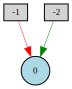

In [70]:
from visualize import draw_net
draw_net(config, p.population[123])

In [72]:
p.population[123].connections.values()

dict_values([<neat.genes.DefaultConnectionGene object at 0x10e9f08d0>, <neat.genes.DefaultConnectionGene object at 0x10e9f05c0>])

In [74]:
 for cg in p.population[123].connections.values():
        print(cg)

DefaultConnectionGene(key=(-1, 0), weight=-1.6662236280631508, enabled=True)
DefaultConnectionGene(key=(-2, 0), weight=1.776267993658669, enabled=True)


In [71]:
eval_genomes(list(p.population.items()), config)

[1.939148806277811, 1.6652149491243142]